# Reading Data From a cvs File

In this exercise, we will build upon what we learned in previous sections to build a regression model using a realistic dataset. We will read the data from a CSV file into two parallel lists X and Y. Thereafter we setup a linear regression using X as independent variable and Y as dependent.

## Data Description

The CSV file contains three columns namely ‘DDate’, ‘FB’ and ‘SNP’. The ‘DDate’ is the first day of week, ‘FB’ and ‘SNP’ are the weekly returns for Facebook stock and S&P-500 index respectively.

## Problem

The S&P 500 Index is a combined metric or index of stock market’s performance constructed by averaging 500 largest U.S. publicly traded companies weighted by market-capitalization. The index is widely regarded as the best gauge of large-cap U.S. equities. We like to test this persumption by comparing the weekly returns on S&P 500 to those on Facebook’s stock.

In [2]:
from matplotlib import pyplot as plt
from sklearn import linear_model, metrics

#data
data = '/Users/skhalil/Desktop/Analysis/DataScience/Regression/returns_fb_snp.csv'

Upon getting familiar with the data, we will use training data (first 50 entries) to train our linear regression model and then will check the model predictivity using the MSE or RMS w.r.t the test data (rest of the data entries)

DDate,FB,SNP

nbins 40
bins [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]
Variance score: 0.20


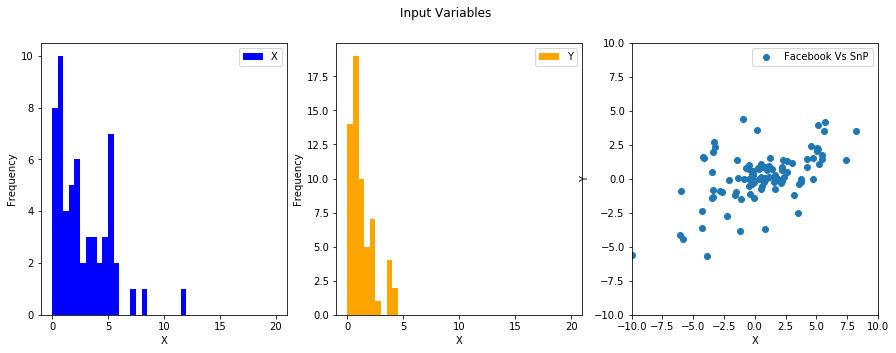

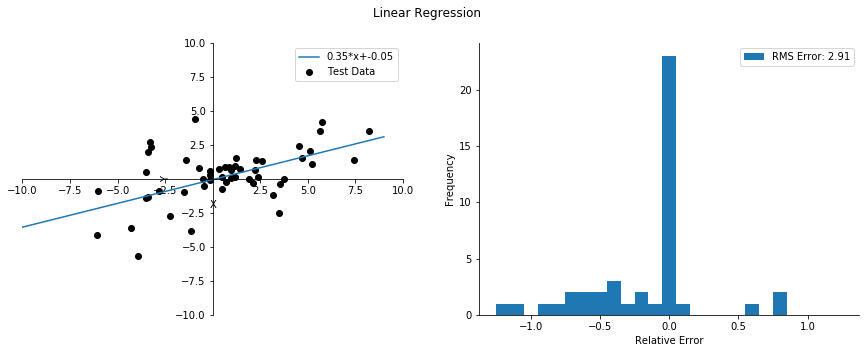

In [4]:
def main():
    #Open the data file
    X, Y = read_data(data)
    
    #Visualizing the data.
    visualize_input_data(X,Y)
    
    #Obtain the coefficients of regression
    X_t, Y_t, Y_mdl, A, B = linear_regression(X,Y)
    
    #Let us visualize the model's performance
    visualize_trained_model(X_t, Y_t, Y_mdl, A, B)
    
    plt.show()
        
        
def read_data(data_file):
    '''
    Input Parameters:
     data_file : Fully qualified name for data file.
    Returns:
      Parallel lists
       X : Weekly return on Facebook stock
       Y : Weekly return on S&P500 index
    '''
    file = open(data_file)
    X,Y = [],[]
    print (file.readline())
    for line in file:
        line = line.replace('\n','')
        line = line.split(',')
        if len(line) < 3: 
            continue
        else:
            X.append(float(line[1])) # 2nd coloumn
            Y.append(float(line[2])) # 3rd coloumn
    file.close()
    return X, Y

def visualize_input_data(X,Y):
    '''
    Input:
     X : a column of x values.
     Y : a column of y values. 
    '''
    
    #Create a figure object with 3 axes.
    fig0,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(15,5))
    
    #How many bins we need for histograming?
    max_range = 10
    min_range = -10
    bin_width = 0.5
    
    ####Number of bins
    nbins =int((max_range-min_range)/bin_width)
    print('nbins', nbins)
    
    ####Bins
    bins = [0+i*bin_width for i in range(0,nbins+1)]
    print('bins', bins)
   
    #Create the histogram a.k.a frequency chart of X    
    n0,b0,p0 = ax0.hist(X,bins=bins,histtype='stepfilled',label='X',color='blue')
    
    #Create a histogram of Y (same binning as in X). 
    n1,b1,p1 = ax1.hist(Y,bins=bins,histtype='stepfilled',label='Y',color='orange')
   
    #Some Cosmetic settings for ax0
    ax0.set_xlabel('X')
    ax0.set_ylabel('Frequency')
    ax0.legend()
    
    #Some Cosmentics settings for ax1
    ax1.set_xlabel('X')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    ##Do a scatter plot for the variables.
    ax2.scatter (X,Y,label='Facebook Vs SnP')
    
    #Set axes labels
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    
    #Set axes ranges
    ax2.set_xlim([-10,10])
    ax2.set_ylim([-10,10])
    
    #Display the legend
    ax2.legend()
    
    #Set a figure title
    fig0.suptitle('Input Variables')
 
   
def linear_regression(X,Y):
    '''
    Input Parameters:
     X : 1D list of independent values.
     Y : 1D list of dependent values.
    Returns:
     Parallel Lists
      X_test : Facebook Returns test set
      Y_test : S&P 500 Returns test set
      Y_mdl  : S&P 500 Regression value.
     Numeric values of a (slope) and b (y-intercept) of regression line ax+b     
    '''
    #Change the row format [a,b,c] to column format [[a],[b],[c]], and keep 50 entries for training
    X_train =[[x] for x in X[0:50] ]
    Y_train =[[y] for y in Y[0:50] ]
    X_test  =[[x] for x in X[50:]  ]
    Y_test  =[[y] for y in Y[50:]  ]

    #Creating an instance of LinearRegression       
    reg = linear_model.LinearRegression()

    #Train the model using training sets.
    reg.fit(X_train,Y_train)
    
    #Use test set to make predictions.
    Y_mdl = reg.predict(X_test).tolist()

    #The slope and the Intercept
    a = reg.coef_[0][0]
    b = reg.intercept_[0]

    #Restore back from column format to row format.
    X_test = [x[0] for x in X_test]
    Y_test = [y[0] for y in Y_test]
    Y_mdl  = [y[0] for y in Y_mdl]
    
    return X_test, Y_test, Y_mdl, a, b


def visualize_trained_model(X_test, Y_test, Y_mdl, A, B):
    '''
    Publish a 2-D scatterplot between X and Y overlaid with 
    the straight line : A*x+B = Y
    '''
    #Create a figure object
    fig0,(ax0,ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ##Do a scatter plot for the variables.
    ax0.scatter (X_test,Y_test,color='black',label='Test Data')
    
    #Set axes labels
    ax0.set_xlabel('X')
    ax0.set_ylabel('Y')
    
    #Set axes ranges
    ax0.set_xlim([-10,10])
    ax0.set_ylim([-10,10])
    
    ##Now is the time to generate the regression line.    
    A = round(A,2)
    B = round(B,2)
    X_line = [i for i in range(-10,10)]
    Y_line = [A*x+B for x in X_line]
    ax0.plot(X_line,Y_line,label = str(A)+'*x'+'+'+str(B))
    
    #Erase the verticle frame spines
    ax0.spines['right'].set_color('none')
    ax0.spines['top'].set_color('none')
    
    #Move the remaining spines to center.
    ax0.spines['left'].set_position('center')
    ax0.spines['bottom'].set_position('center')
    ax0.set_xticks([-10,-7.5,-5,-2.5,2.5,5,7.5,10])
    ax0.set_yticks([-10,-7.5,-5,-2.5,2.5,5,7.5,10])

    #Draw Legend
    ax0.legend()
   
    ##Let us look at the modeling errors: residuals.
    Y_errors = [(y_mdl-y_test)/y_test  if y_test > 0 else 0 for y_test,y_mdl in zip(Y_test, Y_mdl)]
    Y_errors_rms = round ( sum([e*e for e in Y_errors]) / len(Y_errors),2)
    
    ##A histogram of the residuals.
    err_min,err_max,binw = -1.25,1.25,0.1
    nbins = int ((err_max-err_min)/binw)+1
    bins  = [err_min+i*binw for i in range(0,nbins)]
    ax1.hist(Y_errors,bins=bins,label='RMS Error: '+str(Y_errors_rms))

    #Set axes labels
    ax1.set_xlabel('Relative Error')
    ax1.set_ylabel('Frequency')
    
    #Erase the spines
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    
    #Draw the legend
    ax1.legend()
        
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f'% metrics.r2_score(Y_test, Y_mdl))
    
    fig0.suptitle('Linear Regression')

    

    
if __name__ == '__main__':
    main()